In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Loading our dataset
bank = pd.read_csv("C:/Users/geeta/bank.csv",sep=';')

#Viewing
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.shape

(41188, 21)

In [4]:
##PRE PROCESSING THE DATA
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Getting the statistical Analysis
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#Let us check for any Missing values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#Let us check for any Missing values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#Let us check for duplicates
bank.duplicated().sum()

12

In [11]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


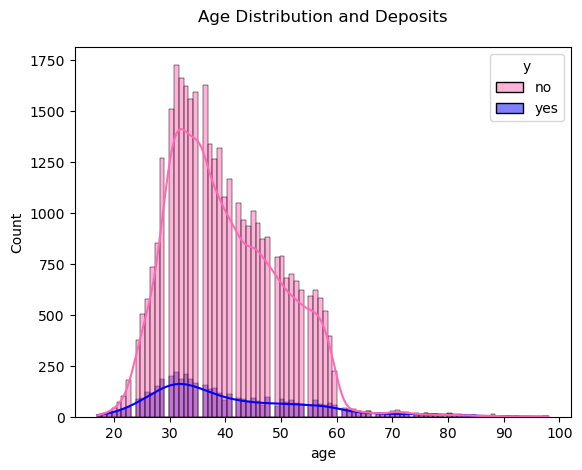

In [12]:
#Exploratory Data Analysis (EDA)
#Age distribution
sns.histplot(x="age", data=bank, kde=True, hue= "y", palette = ["hotpink","blue"])
plt.title("Age Distribution and Deposits\n")
plt.show()

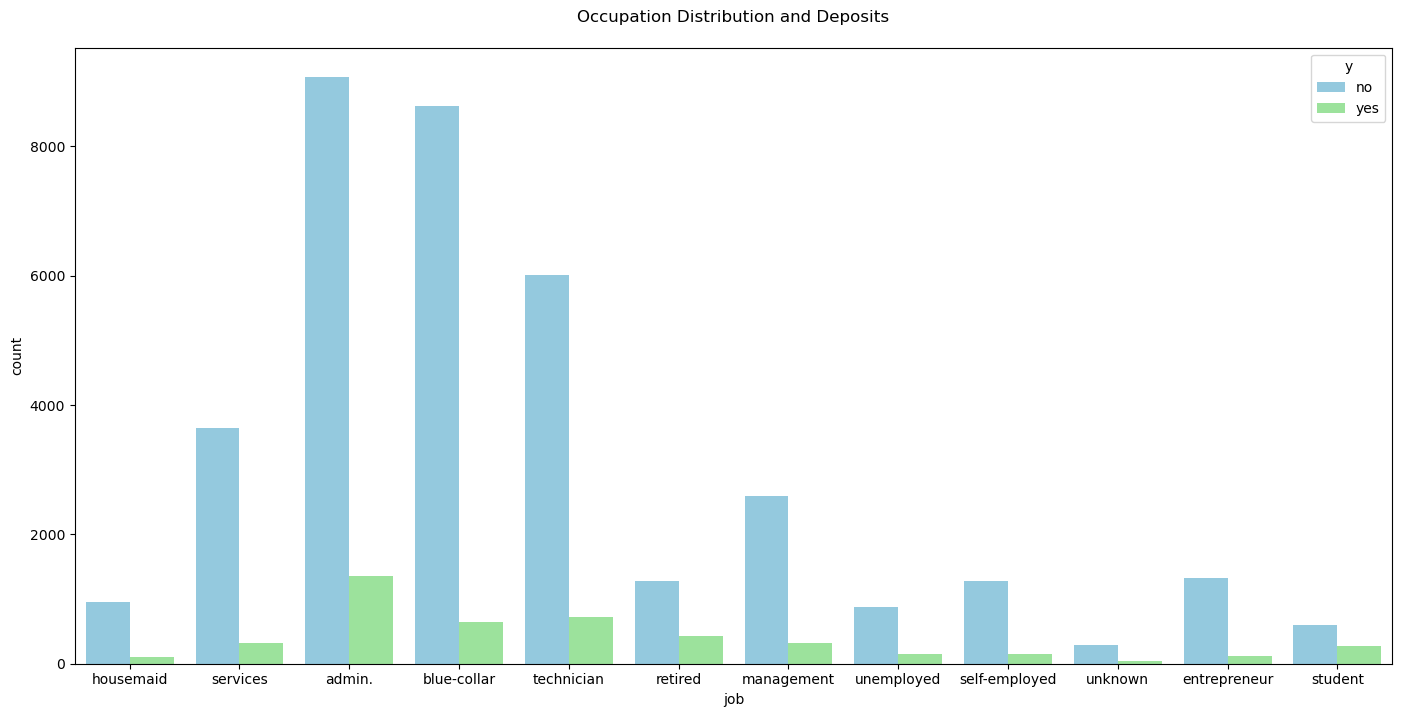

In [13]:
#Occupation distribution
plt.figure(figsize=(17,8))
sns.countplot(x="job", data= bank, hue ="y", palette = ["skyblue","lightgreen"])
plt.title("Occupation Distribution and Deposits\n")
plt.show()

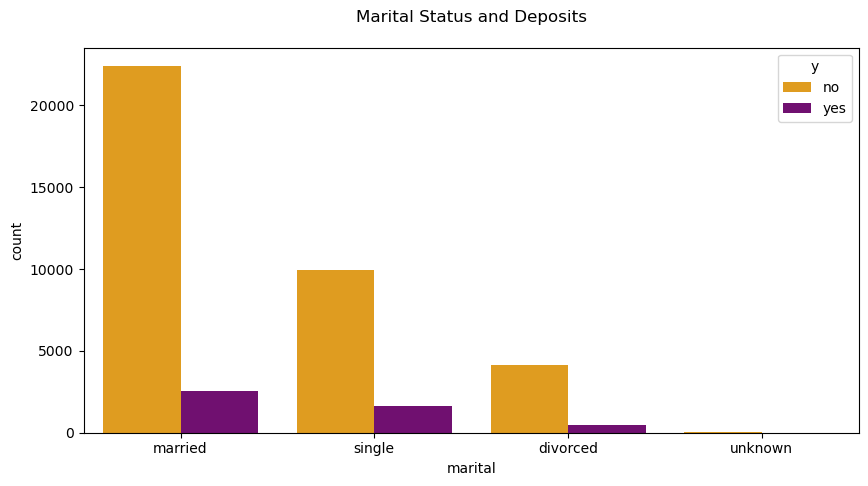

In [14]:
#Marital Status Distribution 
plt.figure(figsize=(10,5))
sns.countplot(x="marital", data= bank, hue ="y", palette = ["orange","purple"])
plt.title("Marital Status and Deposits\n")
plt.show()

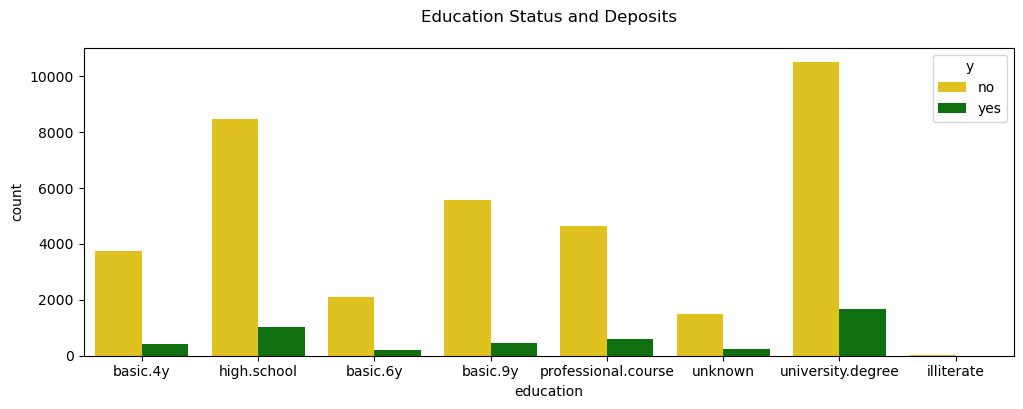

In [15]:
#Education Status Distribution 
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y", palette = ["gold","green"])
plt.title("Education Status and Deposits\n")
plt.show()

In [16]:
#Credit defaults 
bank.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

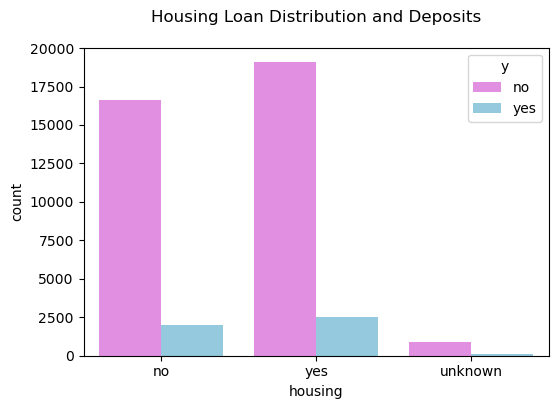

In [17]:
#Housing Loan Distribution 
plt.figure(figsize=(6,4))
sns.countplot(x="housing", data= bank, hue ="y", palette = ["violet","skyblue"])
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

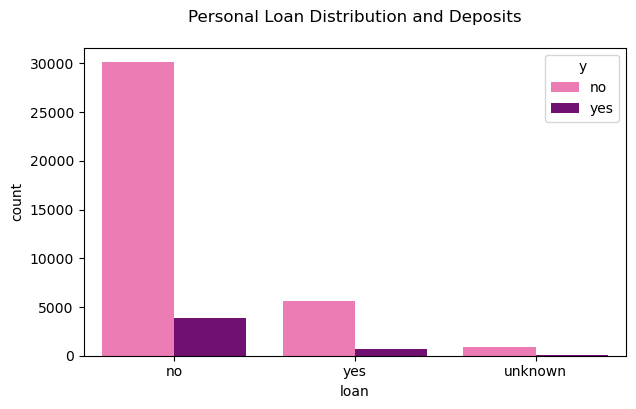

In [18]:
#Personal Loan Distribution 
plt.figure(figsize=(7,4))
sns.countplot(x="loan", data= bank, hue ="y", palette = ["hotpink","purple"])
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

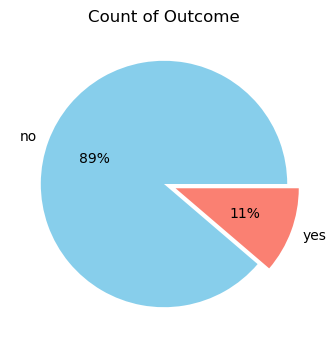

In [19]:
# Count of Outcome
counts = bank.y.value_counts()
keys = counts.index
data = counts.values

# Custom colors for the pie chart
colors = ['skyblue', 'salmon']

# Create the pie chart with custom colors
plt.figure(figsize=(8, 4))
explode = [0, 0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%', colors=colors)

# Add title
plt.title('Count of Outcome')

# Show the plot
plt.show()

In [20]:
#Label Encoding Categorical Features
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [21]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


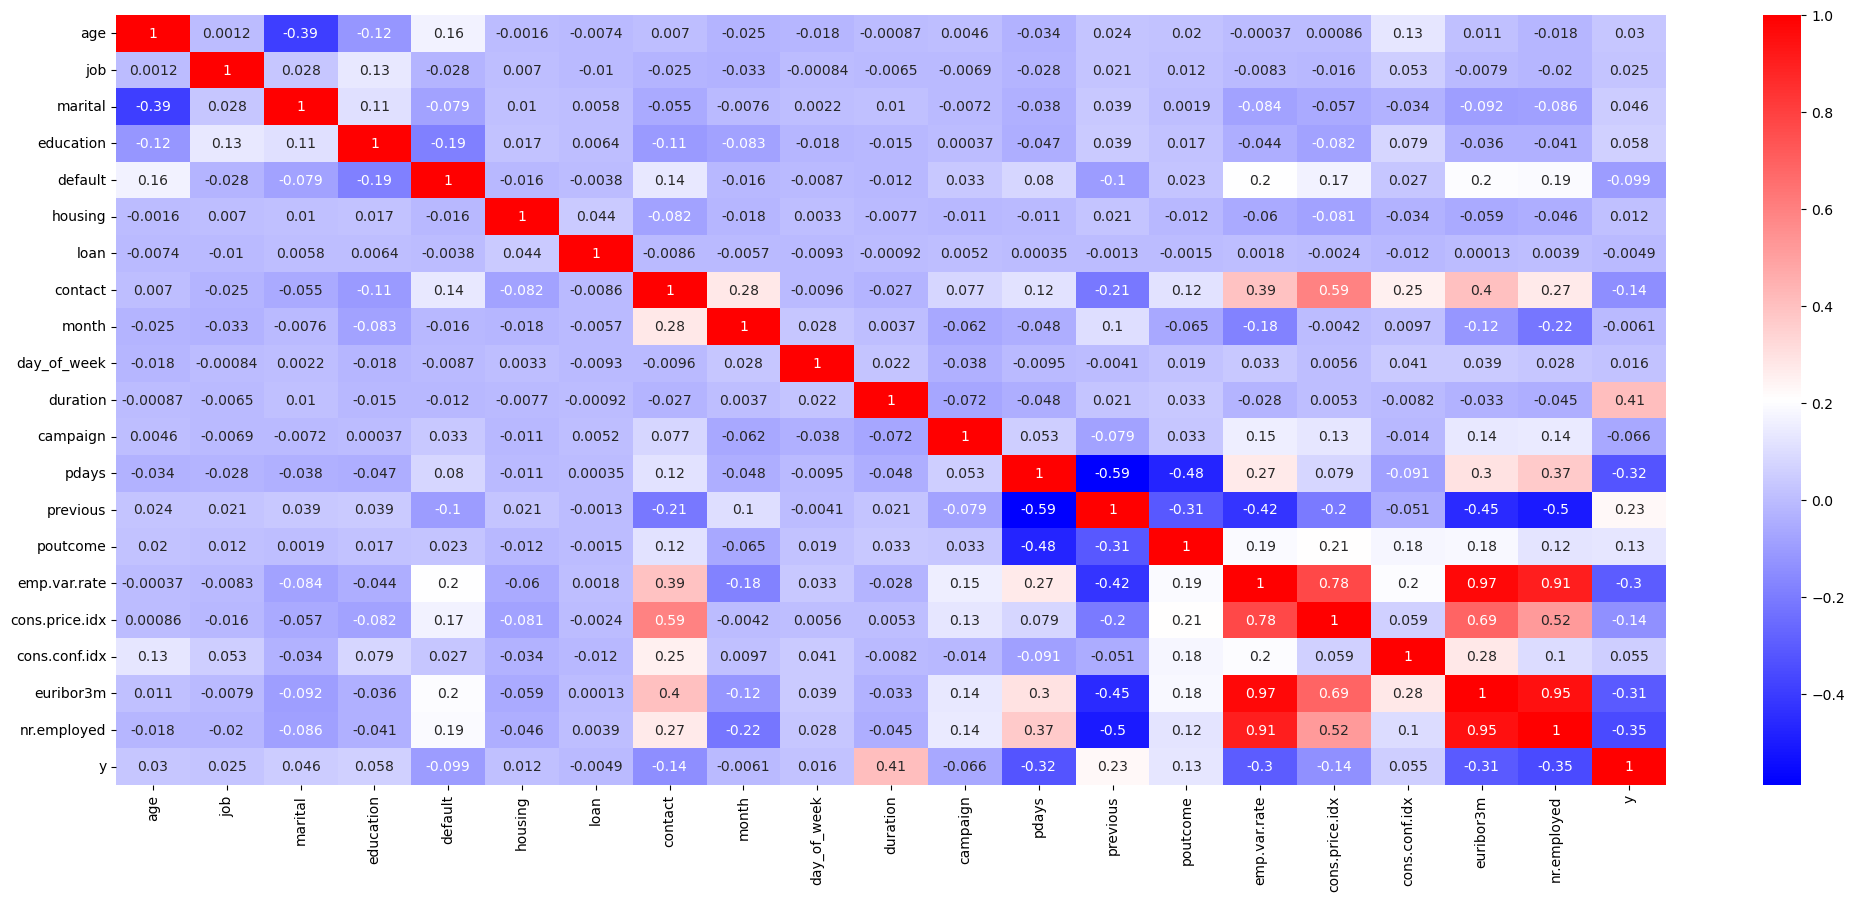

In [22]:
#Correlation Analysis using Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [23]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Describe the scaled features
description = X_scaled.describe()
print(description)

                age           job       marital     education       default  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -6.382947e-17 -2.708440e-17 -5.382377e-17 -6.624464e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -1.036184e+00 -1.926061e+00 -1.753925e+00 -5.135997e-01   
25%   -7.699804e-01 -1.036184e+00 -2.837415e-01 -8.177951e-01 -5.135997e-01   
50%   -1.942267e-01 -4.797808e-01 -2.837415e-01 -3.497303e-01 -5.135997e-01   
75%    6.694038e-01  9.112268e-01  1.358578e+00  1.054464e+00 -5.135997e-01   
max    5.563310e+00  2.024033e+00  3.000897e+00  1.522529e+00  4.404253e+00   

            housing          loan       contact         month   day_of_week  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -7.072995e-18  7.081621e-17 -1.104077e-17  7.038493e-17 -3.993655e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.

In [24]:
#Building the Decision Tree Classifier
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [25]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))    

Train Score: 1.0
Test Score: 0.8890507404709881


In [26]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8898409028945234

In [27]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10981
           1       0.50      0.53      0.51      1376

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [28]:
#Hyperparameter tunning
#Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [30]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9}

In [31]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9)

In [32]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.9140856083036347

In [33]:
#Using this best estimators to built our model.
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [34]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9185251985709826
Test Score: 0.9140568099053168


In [36]:
pred_y = clf.predict(test_X)

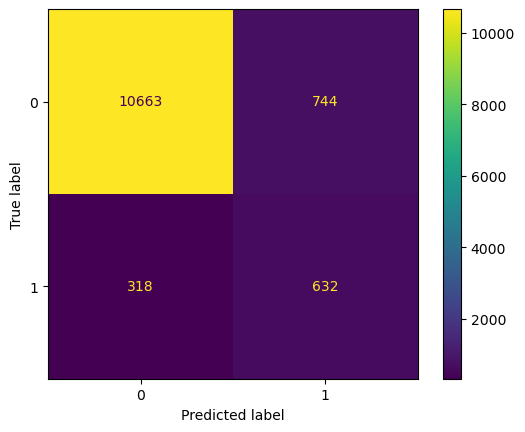

In [37]:
##Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [38]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11407
           1       0.46      0.67      0.54       950

    accuracy                           0.91     12357
   macro avg       0.72      0.80      0.75     12357
weighted avg       0.93      0.91      0.92     12357



In [39]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.40568099053168


In [40]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  90.83921057077634


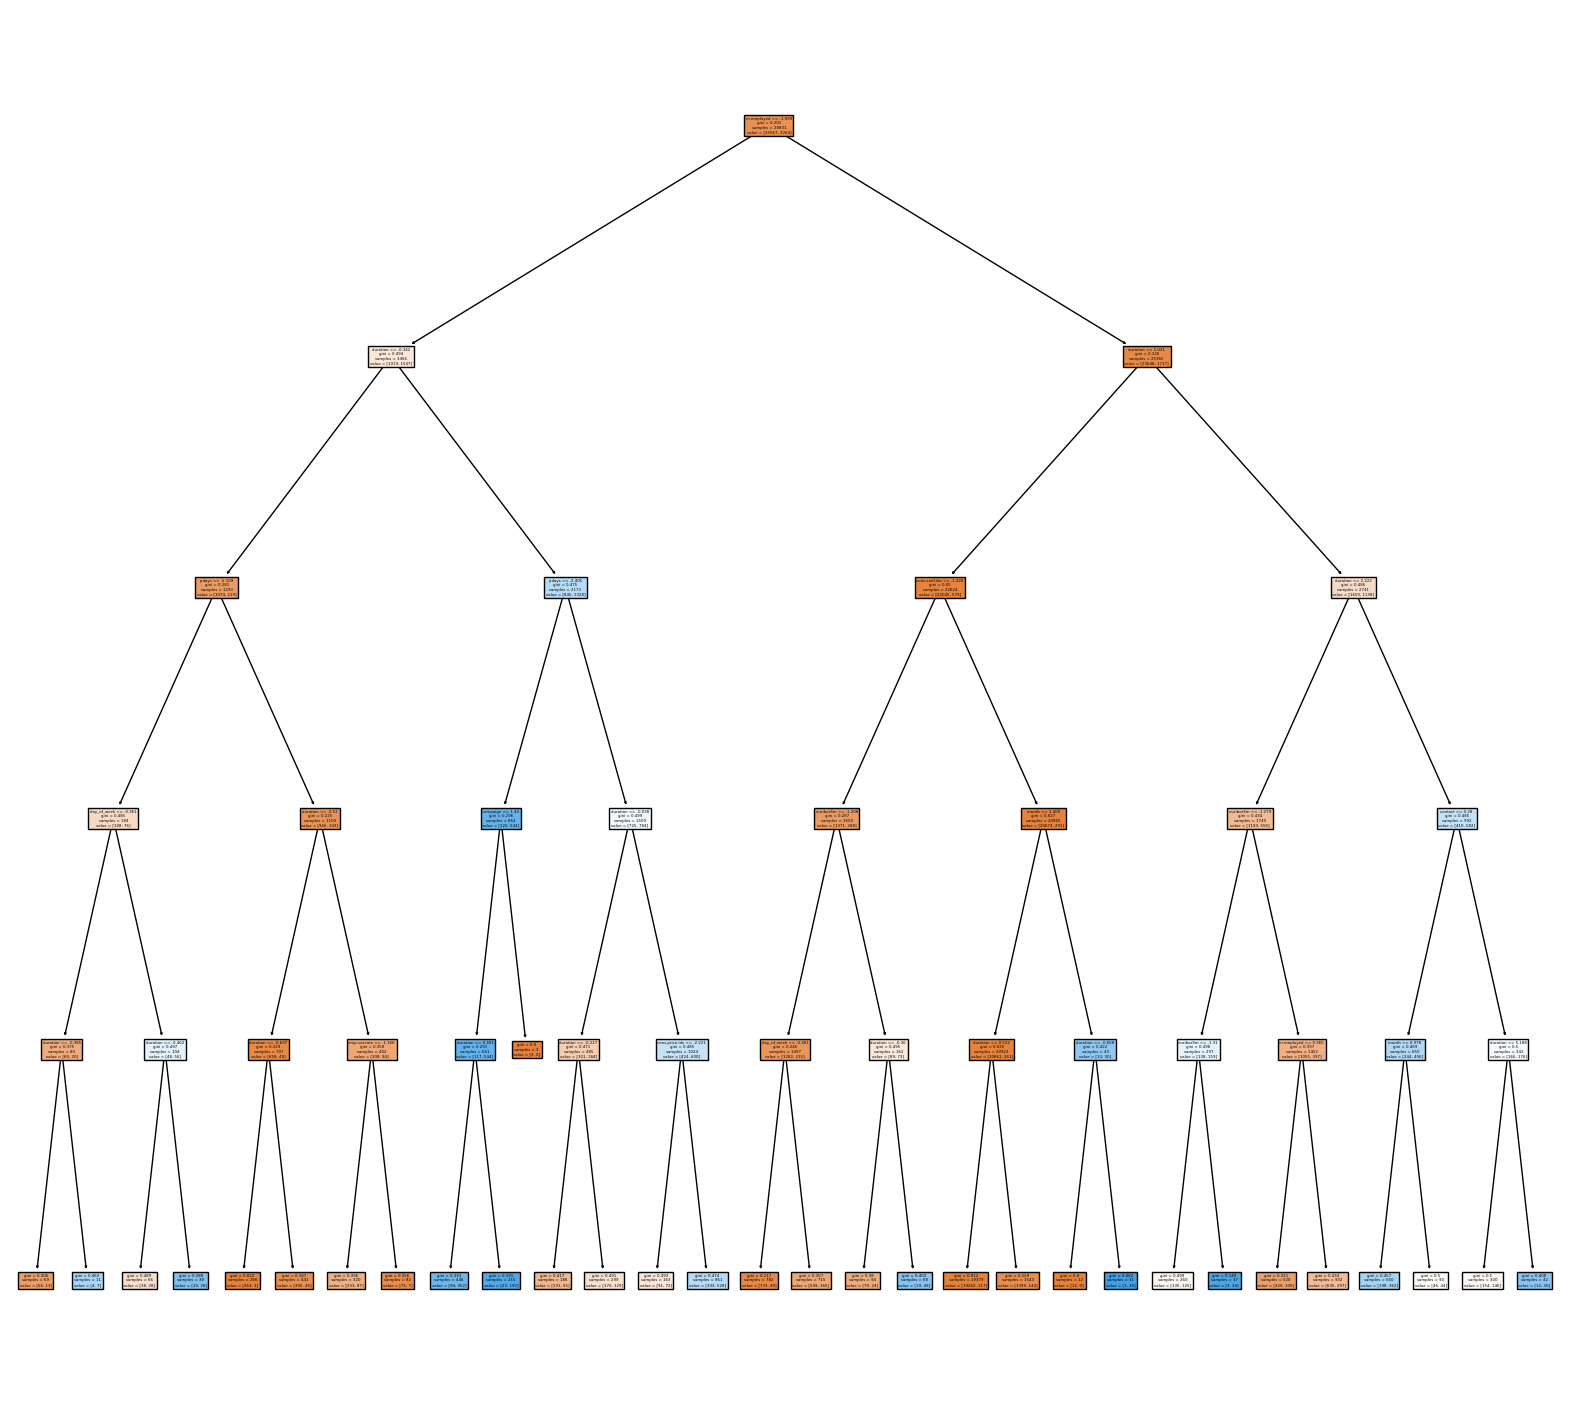

In [41]:
from sklearn import tree

# Convert the Index object to a list
feature_names = list(X.columns)

# Plot the decision tree
fig = plt.figure(figsize=(20, 18))
t = tree.plot_tree(clf, filled=True, feature_names=feature_names)

# Show the plot
plt.show()